In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s6e2/sample_submission.csv
/kaggle/input/playground-series-s6e2/train.csv
/kaggle/input/playground-series-s6e2/test.csv


# 1. Import Libraries and Setup

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Metics
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc
)

# Settings
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print('All Libraries Loaded Succesfully')

All Libraries Loaded Succesfully


# 2. Load and Explore Data


In [3]:
#  Load training data
train = pd.read_csv('/kaggle/input/playground-series-s6e2/train.csv')

# Load testing data
test = pd.read_csv('/kaggle/input/playground-series-s6e2/test.csv')

#  Explore the training data
print("Training data shape:", train.shape)
print("\nFirst few rows:")
train.head()


Training data shape: (630000, 15)

First few rows:


,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


In [4]:
# Dataset Information
print("\nColumn info:")
print(train.info())

print("\nTarget distribution:")
print(train['Heart Disease'].value_counts())



Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       630000 non-null  int64  
 1   Age                      630000 non-null  int64  
 2   Sex                      630000 non-null  int64  
 3   Chest pain type          630000 non-null  int64  
 4   BP                       630000 non-null  int64  
 5   Cholesterol              630000 non-null  int64  
 6   FBS over 120             630000 non-null  int64  
 7   EKG results              630000 non-null  int64  
 8   Max HR                   630000 non-null  int64  
 9   Exercise angina          630000 non-null  int64  
 10  ST depression            630000 non-null  float64
 11  Slope of ST              630000 non-null  int64  
 12  Number of vessels fluro  630000 non-null  int64  
 13  Thallium                 630000 non-null  int

In [5]:
# Check Missing Values
print("\nMissing values:")
print(train.isnull().sum())

# Basic Statistic
print("\nBasic statistics:")
train.describe()


Missing values:
id                         0
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

Basic statistics:


,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,314999.500000,54.136706,0.714735,3.312752,130.497433,245.011814,0.079987,0.981660,152.816763,0.273725,0.716028,1.455871,0.451040,4.618873
std,181865.479132,8.256301,0.451541,0.851615,14.975802,33.681581,0.271274,0.998783,19.112927,0.445870,0.948472,0.545192,0.798549,1.950007
min,0.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,157499.750000,48.000000,0.000000,3.000000,120.000000,223.000000,0.000000,0.000000,142.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,314999.500000,54.000000,1.000000,4.000000,130.000000,243.000000,0.000000,0.000000,157.000000,0.000000,0.100000,1.000000,0.000000,3.000000
75%,472499.250000,60.000000,1.000000,4.000000,140.000000,269.000000,0.000000,2.000000,166.000000,1.000000,1.400000,2.000000,1.000000,7.000000
max,629999.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


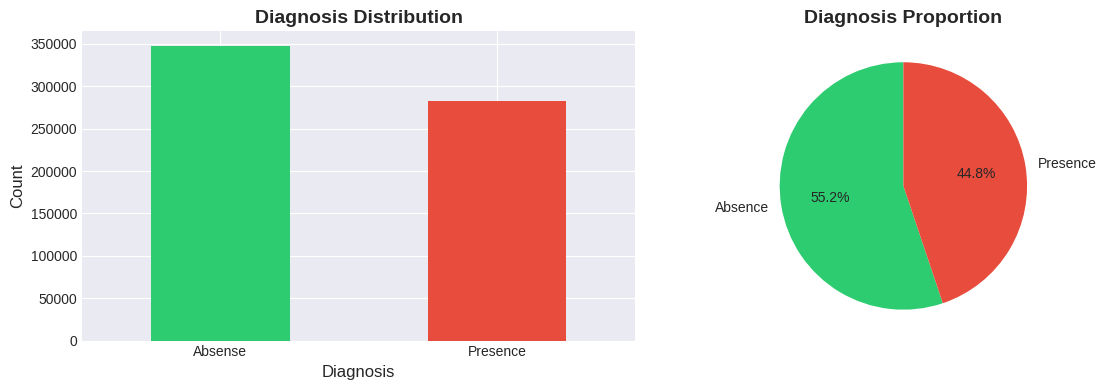

In [6]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Count plot
train['Heart Disease'].value_counts().plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Diagnosis Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Diagnosis', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(['Absense', 'Presence'], rotation=0)

# Pie chart
train['Heart Disease'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                                     colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Diagnosis Proportion', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

# 3. Data Preprocessin

In [7]:
# Prepare features and target
X = train.drop(['id', 'Heart Disease'], axis=1)
y = train['Heart Disease'].map({'Presence': 1, 'Absence': 0})

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"\nFeature names ({len(X.columns)}):")
print(X.columns.tolist())

Feature matrix shape: (630000, 13)
Target vector shape: (630000,)

Feature names (13):
['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']


In [8]:
# Feature Statistic
print('Feature Statistic')
X.describe().round(2)

Feature Statistic


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,630000.00,630000.00,630000.00,630000.00,630000.00,630000.00,630000.00,630000.00,630000.00,630000.00,630000.00,630000.00,630000.00
mean,54.14,0.71,3.31,130.50,245.01,0.08,0.98,152.82,0.27,0.72,1.46,0.45,4.62
std,8.26,0.45,0.85,14.98,33.68,0.27,1.00,19.11,0.45,0.95,0.55,0.80,1.95
min,29.00,0.00,1.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,1.00,0.00,3.00
25%,48.00,0.00,3.00,120.00,223.00,0.00,0.00,142.00,0.00,0.00,1.00,0.00,3.00
50%,54.00,1.00,4.00,130.00,243.00,0.00,0.00,157.00,0.00,0.10,1.00,0.00,3.00
75%,60.00,1.00,4.00,140.00,269.00,0.00,2.00,166.00,1.00,1.40,2.00,1.00,7.00
max,77.00,1.00,4.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,3.00,3.00,7.00


In [9]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test set size: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")
print(f"\nTraining set class distribution:")
print(y_train.value_counts())
print(f"\nTest set class distribution:")
print(y_test.value_counts())

Training set size: 504000 (80.0%)
Test set size: 126000 (20.0%)

Training set class distribution:
Heart Disease
0    278037
1    225963
Name: count, dtype: int64

Test set class distribution:
Heart Disease
0    69509
1    56491
Name: count, dtype: int64


In [10]:
# Feature Scaling
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

print("Feature Scaling Completed")
print(f"\nScaled feature statistic (First 5 feature):")
print(f"Mean: {X_train_scaled[:,:5].mean(axis=0).round(3)}")
print(f"Std: {X_train_scaled[:,:5].std(axis=0).round(3)}")

Feature Scaling Completed

Scaled feature statistic (First 5 feature):
Mean: [-0. -0. -0. -0.  0.]
Std: [1. 1. 1. 1. 1.]


# 4. Model Training and Evaluation

In [11]:
# Calculate class weights for XGBoost
neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
scale_pos_weight = neg_count / pos_count
print(f"XGBoost scale_pos_weight: {scale_pos_weight:.2f}")

# Models that NEED scaling
distance_models = {
    'Logistic Regression': LogisticRegression(
        class_weight='balanced', 
        max_iter=1000, 
        random_state=42
    ),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Models that DON'T need scaling
tree_models = {
    'Random Forest': RandomForestClassifier(
        class_weight={0:1, 1:2},
        n_estimators=200,
        max_depth=8,
        min_samples_split=10,
        random_state=42
    ),
    'XGBoost': XGBClassifier(
        scale_pos_weight=scale_pos_weight,  
        max_depth=5,
        learning_rate=0.05,
        n_estimators=200,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss', 
        random_state=42
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        max_depth=4,
        learning_rate=0.05,
        n_estimators=200,
        subsample=0.8,
        random_state=42
    )
}

print(f"\n✓ {len(distance_models)} distance-based models (need scaling)")
print(f"✓ {len(tree_models)} tree-based models (don't need scaling)")

XGBoost scale_pos_weight: 1.23

✓ 2 distance-based models (need scaling)
✓ 3 tree-based models (don't need scaling)


In [12]:
# Initialize as DICTIONARIES
results = []
trained_models = {}
predictions = {}
probabilities = {}
print("Training Models.....\n")

# Train Distance Models
for name, model in distance_models.items():
    print(f"Training {name}...", end=' ')
    
    # Train
    model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    # Store
    trained_models[name] = model
    predictions[name] = y_pred
    probabilities[name] = y_prob
    
    # Calculate metrics (no CV!)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'Precision': round(prec, 4),
        'Recall': round(rec, 4),
        'F1-Score': round(f1, 4)
    })
    print("Done")

Training Models.....

Training Logistic Regression... Done
Training KNN... Done


In [14]:

# Train Tree Models
for name, model in tree_models.items():
    print(f"Training {name}...", end=' ')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Store model and predictions
    trained_models[name] = model
    predictions[name] = y_pred
    probabilities[name] = y_prob
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'Precision': round(prec, 4),
        'Recall': round(rec, 4),
        'F1-Score': round(f1, 4),
        'CV Score': round(cv_scores.mean(), 4)
    })
    print(f"✓ (Accuracy: {acc:.4f})")

print("\nAll models trained successfully!")

Training Random Forest... ✓ (Accuracy: 0.8731)
Training XGBoost... ✓ (Accuracy: 0.8879)
Training Gradient Boosting... ✓ (Accuracy: 0.8885)

All models trained successfully!


In [15]:
# Create results dataframe
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)

print("="*80)
print("MODEL PERFORMANCE COMPARISON")
print("="*80)
print(results_df.to_string(index=False))
print("="*80)

# Highlight best model
best_model = results_df.iloc[0]['Model']
best_acc = results_df.iloc[0]['Accuracy']
print(f"\n🏆 Best Model: {best_model} (Accuracy: {best_acc})")

MODEL PERFORMANCE COMPARISON
              Model  Accuracy  Precision  Recall  F1-Score  CV Score
  Gradient Boosting    0.8885     0.8821  0.8674    0.8747    0.8871
  Gradient Boosting    0.8885     0.8821  0.8674    0.8747    0.8871
            XGBoost    0.8879     0.8688  0.8832    0.8760    0.8865
            XGBoost    0.8879     0.8688  0.8832    0.8760    0.8865
Logistic Regression    0.8839     0.8671  0.8752    0.8711       NaN
      Random Forest    0.8731     0.8216  0.9159    0.8662    0.8719
      Random Forest    0.8731     0.8216  0.9159    0.8662    0.8719
                KNN    0.8718     0.8621  0.8501    0.8560       NaN

🏆 Best Model: Gradient Boosting (Accuracy: 0.8885)
